In [9]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

plt.rcParams['figure.figsize']=(30,15)

In [2]:
df_horas_extras = pd.read_excel(r'BD\Horas Extras Por Dia - 01-2020 a 01-2021.xls', sheet_name='Planilha1')
df_horas_extras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Matricula                           65535 non-null  int64         
 1   Data                                65535 non-null  datetime64[ns]
 2   Horas Extras Pagas (SO)             65535 non-null  object        
 3   Horas Extras Pagas (SX)             65535 non-null  object        
 4   Horas Extras Pagas em Feriado (SO)  65535 non-null  object        
 5   Horas Extras Pagas em Feriado (SX)  65535 non-null  object        
 6   Horas Extras Não Autorizadas        65535 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 3.5+ MB


In [3]:
df_horas_extras['Horas Extras Pagas (SO)'][0][:2]

'14'

In [4]:
df_horas_extras['Horas Extras Pagas (SO)'][0][-2:]

'00'

In [5]:
df_horas_extras['Min SO'] = df_horas_extras['Horas Extras Pagas (SO)'].apply(lambda x: int(x[:2])*60 + int(x[:2])) + df_horas_extras['Horas Extras Pagas em Feriado (SO)'].apply(lambda x: int(x[:2])*60 + int(x[:2]))
#pegar todos os atrasos
df_horas_extras = df_horas_extras[df_horas_extras['Min SO']>0]
# Menor que 15h, provavel erro de marcação
df_horas_extras = df_horas_extras[df_horas_extras['Min SO']<=16*60]
df_horas_extras['Min SO'].describe()

count    10347.000000
mean       330.515415
std        238.991281
min         61.000000
25%         61.000000
50%        305.000000
75%        549.000000
max        915.000000
Name: Min SO, dtype: float64

<AxesSubplot:xlabel='Min SO', ylabel='Count'>

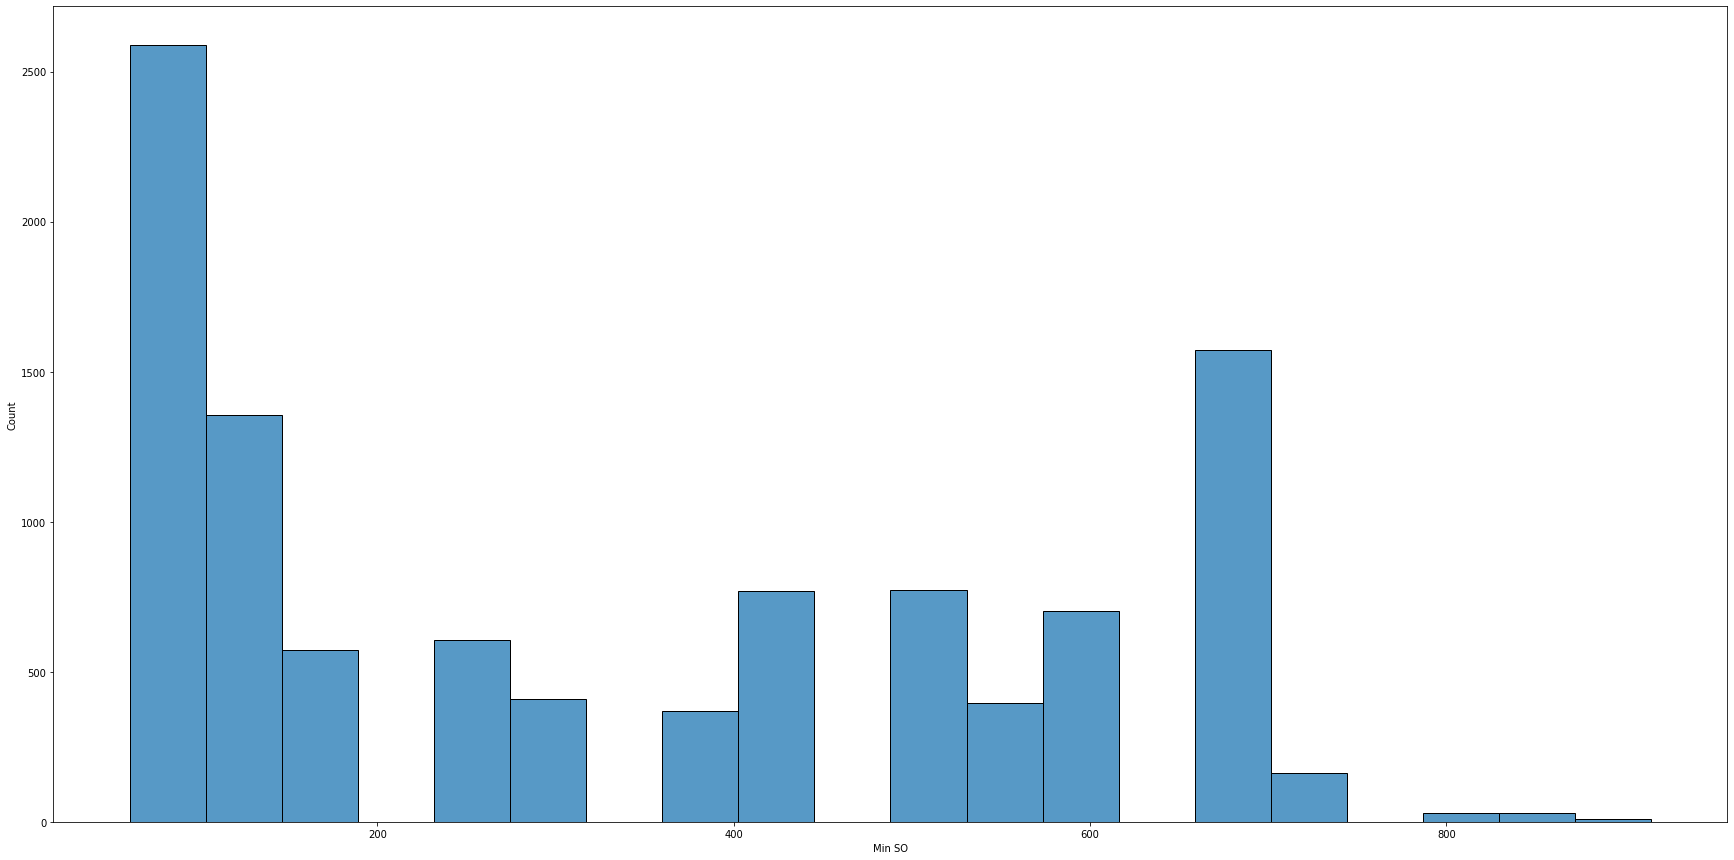

In [6]:
sns.histplot(df_horas_extras['Min SO'])

In [7]:
df_horas_extras['Min SO'].describe()

count    10347.000000
mean       330.515415
std        238.991281
min         61.000000
25%         61.000000
50%        305.000000
75%        549.000000
max        915.000000
Name: Min SO, dtype: float64

In [21]:
df_min_extras = df_horas_extras['Min SO']
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_min_extras)

ValueError: Expected 2D array, got 1D array instead:
array=[854. 793. 732. ...  61.  61.  61.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.